# Задача
Сконструировать классный эмбэддинг для задачи кластеризации новостей

Данные: распаршенный датасет новостей на русском языке. 2.7к размеченных примеров для подбора гиперпараметров кластеризации.


---


Метрика: accuracy (доля совпавших ответов с разметкой)

# Данные

In [ ]:
!wget https://www.dropbox.com/s/rrkxdnml6ukql8j/ru_clustering_0517.tsv -O data_train_target.tsv
!wget https://www.dropbox.com/s/a9b7rcxnfbmvhej/ru_tg_0517.jsonl.tar.gz -O - | tar -xz --to-stdout ru_tg_0517.jsonl > data_train.jsonl
!wget https://www.dropbox.com/s/ehsm8bj13wug7na/ru_tg_0525.jsonl.tar.gz -O - | tar -xz --to-stdout ru_tg_0525.jsonl > data_test.jsonl
!wget https://www.dropbox.com/s/r8iqi6h6x1w0pzv/ru_tg_1101_0510.jsonl.tar.gz -O - | tar -xz --to-stdout ru_tg_1101_0510.jsonl > data.jsonl

--2020-11-09 12:37:57--  https://www.dropbox.com/s/rrkxdnml6ukql8j/ru_clustering_0517.tsv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:6019:1::a27d:401
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/rrkxdnml6ukql8j/ru_clustering_0517.tsv [following]
--2020-11-09 12:37:57--  https://www.dropbox.com/s/raw/rrkxdnml6ukql8j/ru_clustering_0517.tsv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4d87eab07aa149c94d372b84f8.dl.dropboxusercontent.com/cd/0/inline/BC06xBP23zqheuj_DNLVxgGvWFCOWy9EmwtCigb_wavpEvfxiWBsdHRrADnRsR5D3ytOyqyCHfup42GE5-st6zqZK7oyuWEieQNt0fsRV4iIEkewGNQ_f3cz25pjfuPc_iM/file# [following]
--2020-11-09 12:37:57--  https://uc4d87eab07aa149c94d372b84f8.dl.dropboxusercontent.com/cd/0/inline/BC06xBP23zqheuj_DNLVxgGvWFCOWy9EmwtCigb_wavpEvfxiWBsdHRrADnRsR5D3ytOyqyCHfup42GE5-st

In [ ]:
import json

data = []
with open("data.jsonl", "r") as r:
    for line in r:
        data.append(json.loads(line))
data.sort(key=lambda x: x['timestamp'])

In [ ]:
data[0]

{'category': 'society',
 'description': 'В Риге на причале Андрейсалы по пока не установленным причинам вчера после 10 вечера в Даугаву упал 17-летний Леон Чернявский, сообщает Латвийское радио-4. Сегодня спасатели обнаружили его тело.\xa0',
 'file_name': '4259041647663637904.html',
 'language': 'ru',
 'site_name': 'Latvijas Sabiedriskie Mediji',
 'text': 'В Риге на причале Андрейсалы по пока не установленным причинам вчера после 10 вечера в Даугаву упал 17-летний Леон Чернявский, сообщает Латвийское радио-4. Сегодня спасатели обнаружили его тело.\xa0 По словам матери подростка, Оксаны Чернявской, сын упал с причала в месте, где отсутствует ограждение — напротив одного из береговых ресторанов. Девушка пыталась помочь своему парню, бросилась в воду вслед за ним, но найти его в воде не смогла. Друг, который был на причале вместе с ними, по словам матери, сумел вытащить ее из воды на своем свитере, используя его в качестве веревки. Для поисков второго молодого человека вызвали спасателей.

# Разметка

In [ ]:
import csv

class ClusterizationData:
    def __init__(self, file_name):
        self.url2record = dict()
        with open(file_name, "r") as r:                                    
            for line in r:
                record = json.loads(line)                                       
                self.url2record[record["url"]] = record                              

class ClusterizationMarkup:
    def __init__(self, file_name):
        self.data = dict()                                             
        with open(file_name, "r") as r:                                         
            reader = csv.reader(r, delimiter='\t', quotechar='"')               
            header = next(reader)                                               
            for row in reader:                                                  
                assert len(header) == len(row)                                  
                record = dict(zip(header, row))    
                first_url = record["INPUT:first_url"]
                second_url = record["INPUT:second_url"]
                quality = int(record["OUTPUT:quality"] == "OK")
                self.data[(first_url, second_url)] = quality

In [ ]:
data_train = ClusterizationData("data_train.jsonl")
markup_train = ClusterizationMarkup("data_train_target.tsv")

In [ ]:
data_test = ClusterizationData("data_test.jsonl")

In [ ]:
list(markup_train.data.items())[:5]

[(('https://nikvesti.com/news/incidents/188343',
   'https://for-ua.com/article/1198796'),
  1),
 (('https://www.zakon.kz/5022841-kadyrov-potreboval-uvolit.html',
   'https://lenta.ru/news/2020/05/17/sorry/'),
  1),
 (('https://www.vzsar.ru/news/2020/05/17/saratovcev-jdet-oblachnoe-voskresene.html',
   'http://obozvrn.ru/archives/106266'),
  0),
 (('https://lenta.ru/news/2020/05/17/pik/',
   'https://ria.ru/20200517/1571577985.html'),
  1),
 (('https://www.dp.ru/a/2020/05/17/V_Peterburge_pogibshaja_s_d',
   'https://politexpert.net/196977-denik-n-chekhiya-chut-ne-vystavila-sebya-na-posmeshishe-iz-za-provokacii-s-ricinom?utm_source=politobzor.net'),
  0)]

# Sample submission
Каждый документ идёт в собственный кластер

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

def calc_accuracy_score(gold_markup, url2label):
    for first_url, second_url in list(gold_markup.keys()):
        not_found = first_url not in url2label or second_url not in url2label
        if not_found:
            print("Not found {} pairs from markup".format(first_url + " " + second_url))
            return None

    targets = []
    predictions = []
    for (first_url, second_url), target in gold_markup.items():
        prediction = int(url2label[first_url] == url2label[second_url])
        targets.append(target)
        predictions.append(prediction)
    
    return accuracy_score(targets, predictions)

In [ ]:
url2label = dict()
i = 0
for url, _ in data_train.url2record.items():
    url2label[url] = i
    i += 1
calc_accuracy_score(markup_train.data, url2label)

0.5816364309514994

In [ ]:
with open("sample_submission.tsv", "w") as f:
    print("url\tclid", file=f)
    i = 0
    for url, item in data_test.url2record.items():
        print(f"{url}\t{i}", file=f)
        i += 1

# FastText
## word2vec с учётом буквенных ngram

предсказываем по слову из текста соседние слова

- один и тот же эмбэд для слова вне зависимости от контекста 
- эмбэд текста - усреднение эмбэддингов всех его слов (или другая функция)

https://arxiv.org/abs/1607.04606

https://fasttext.cc/

In [ ]:
!pip install fasttext pyonmttok

!git clone https://github.com/facebookresearch/fastText.git
!cd fastText && mkdir build && cd build && cmake .. && make && make install

     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 2.5MB 8.0MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3029263 sha256=b521927f09dc366eea9ab04df4958c3bd0267b61911c088c23d8660c9ff87711
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext
Cloning into 'fastText'...
remote: Enumerating objects: 3854, done.
remote: Total 3854 (delta 0), reused 0 (delta 0), pack-reused 3854
Receiving objects: 100% (3854/3854), 8.22 MiB | 36.78 MiB/s, done.
Resolving deltas: 100% (2417/2417), done.
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check

In [ ]:
import tqdm.notebook as tq
import pyonmttok

def preprocess(text, tokenizer, max_tokens=None, return_tokens=False):
    lower_text = text.strip().replace("\n", " ").replace("\xa0", " ").lower()
    tokens, _ = tokenizer.tokenize(lower_text)
    if max_tokens:
        tokens = tokens[:max_tokens]
    
    if return_tokens:
        return tokens
    else:
        return " ".join(tokens)

tokenizer=pyonmttok.Tokenizer("conservative", joiner_annotate=False)
with open("train.txt", "w+") as f:
    for item in tq.tqdm(data):
        print(preprocess(item["text"], tokenizer, max_tokens=100), file=f)


In [ ]:
!head train.txt -n 2

в риге на причале андрейсалы по пока не установленным причинам вчера после 10 вечера в даугаву упал 17-летний леон чернявский , сообщает латвийское радио-4 . сегодня спасатели обнаружили его тело . по словам матери подростка , оксаны чернявской , сын упал с причала в месте , где отсутствует ограждение — напротив одного из береговых ресторанов . девушка пыталась помочь своему парню , бросилась в воду вслед за ним , но найти его в воде не смогла . друг , который был на причале вместе с ними , по словам матери , сумел вытащить ее из воды на своем свитере ,
начиная с сегодняшнего дня , 1 ноября , в россии стало обязательным оформление электронных птс . ими будут сопровождаться все новые автомобили , выпускаемые в россии или же официально импортируемые в страну . владельцам бумажных птс беспокоиться не стоит . документ является бессрочным и подлежит обмену исключительно по желанию хозяина машины . все основные сведения по автомобилю и его собственнику отныне хранятся в электронной централиз

In [ ]:
!wc -l train.txt

488335 train.txt


In [ ]:
!fasttext skipgram

Empty input or output path.

The following arguments are mandatory:
  -input              training file path
  -output             output file path

The following arguments are optional:
  -verbose            verbosity level [2]

The following arguments for the dictionary are optional:
  -minCount           minimal number of word occurences [5]
  -minCountLabel      minimal number of label occurences [0]
  -wordNgrams         max length of word ngram [1]
  -bucket             number of buckets [2000000]
  -minn               min length of char ngram [3]
  -maxn               max length of char ngram [6]
  -t                  sampling threshold [0.0001]
  -label              labels prefix [__label__]

The following arguments for training are optional:
  -lr                 learning rate [0.05]
  -lrUpdateRate       change the rate of updates for the learning rate [100]
  -dim                size of word vectors [100]
  -ws                 size of the context window [5]
  -epoch         

In [ ]:
# TODO: expirements with params i.e. cbow instead of skipgram, lr, wordNGrams ... more epochs, data
!fasttext skipgram -input train.txt -output model -epoch 1

Read 47M words
Number of words:  206825
Number of labels: 0
Progress: 100.0% words/sec/thread:    5059 lr:  0.000000 avg.loss:  1.815759 ETA:   0h 0m 0s


In [ ]:
import fasttext

model = fasttext.load_model("model.bin")

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

def get_embedding(text, model, tokenizer):
    tokens = preprocess(text, tokenizer, return_tokens=True)
    vectors = [model.get_word_vector(token) for token in tokens]
    norm_vectors = [x / np.linalg.norm(x) for x in vectors]
    return np.mean(norm_vectors, axis=0)

def do_clustering(clustering_model, data, model, tokenizer):
    embeddings = np.zeros((len(data.url2record), 100))
    idx2url = []
    for i, url_record in enumerate(data.url2record.items()):
        url, record = url_record
        embeddings[i] = get_embedding(record["text"], model, tokenizer)
        idx2url.append(url)

    clustering_model.fit(embeddings)
    labels = clustering_model.labels_

    url2label = dict()
    
    max_label = max(labels)
    for i, label in enumerate(labels):
        url2label[idx2url[i]] = label
    return url2label

clustering_model = AgglomerativeClustering(
    n_clusters=None,
    distance_threshold=0.01, # TODO: search the best one
    linkage="single",
    affinity="cosine"
)

url2label = do_clustering(clustering_model, data_train, model, tokenizer)

calc_accuracy_score(markup_train.data, url2label)

0.772306553128471

In [ ]:
url2label = do_clustering(clustering_model, data_test, model, tokenizer)
with open("fasttext_prediction.tsv", "w+") as f:
    print("url\tclid", file=f)
    for url, label in url2label.items():
        print(f"{url}\t{label}", file=f)

# BERT

12 - 24 трансформеров, byte pair encoding

предсказываем является ли одно предложение продолжением другого + предсказываем замаскированные слова в тексте

- механизм внимания: каждое слово "смотрит" на соседние. Эмбэд слова зависит от контекста
- эмбэддинг слова: эмбэддинг на выходе последнего слоя (или другого слоя/слоёв)
- эмбэддинг текста: усреднение эмбэдов слов (или другая функция)

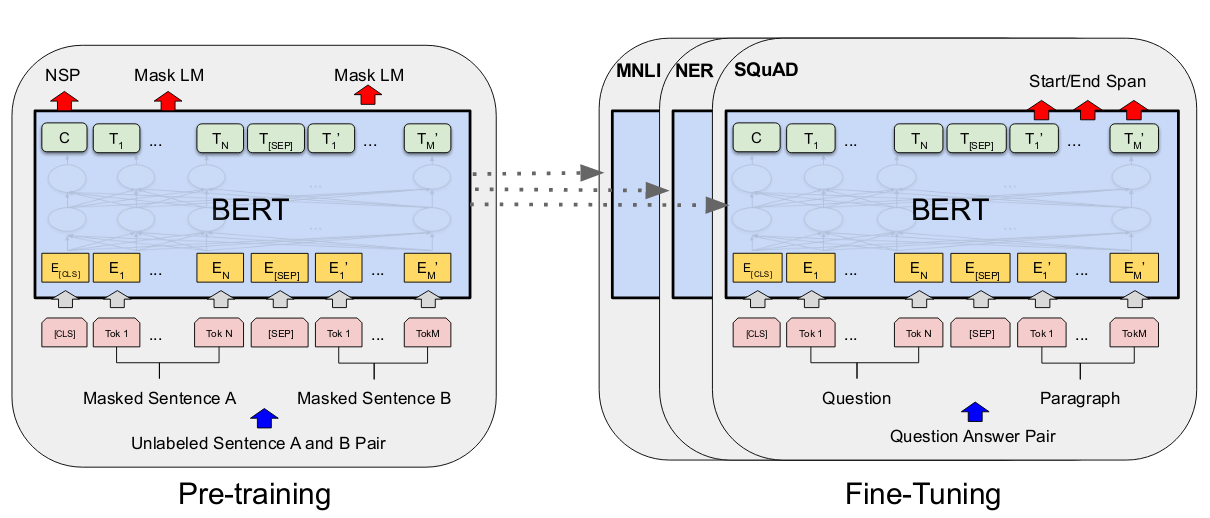

https://arxiv.org/abs/1810.04805

https://huggingface.co/transformers/model_doc/bert.html

http://docs.deeppavlov.ai/en/master/features/models/bert.html

In [ ]:
!pip install --upgrade sentence-transformers
!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

     |████████████████████████████████| 71kB 5.4MB/s 
     |████████████████████████████████| 1.1MB 9.9MB/s 
     |████████████████████████████████| 1.1MB 27.7MB/s 
     |████████████████████████████████| 3.0MB 53.1MB/s 
     |████████████████████████████████| 890kB 47.9MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.8-cp36-none-any.whl size=101996 sha256=b3411d56d9a0f0d1acef2f124ab1b8a5816317aa041408c294419e8e06ac2aee
  Stored in directory: /root/.cache/pip/wheels/27/ec/b3/d12cc8e4daf77846db6543033d3a5642f204c0320b15945647
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=a09f74eb4acc693ac6b175d708d7037a40e268f3342e3fcaac6e5e80fd55223d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

In [ ]:
!wget http://files.deeppavlov.ai/deeppavlov_data/bert/rubert_cased_L-12_H-768_A-12_pt.tar.gz 
!tar xvzf rubert_cased_L-12_H-768_A-12_pt.tar.gz && mv rubert_cased_L-12_H-768_A-12_pt rubert

!mv rubert/bert_config.json rubert/config.json

--2020-11-09 13:28:37--  http://files.deeppavlov.ai/deeppavlov_data/bert/rubert_cased_L-12_H-768_A-12_pt.tar.gz
Resolving files.deeppavlov.ai (files.deeppavlov.ai)... 93.175.29.74
Connecting to files.deeppavlov.ai (files.deeppavlov.ai)|93.175.29.74|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 662024852 (631M) [application/octet-stream]
Saving to: ‘rubert_cased_L-12_H-768_A-12_pt.tar.gz’

rubert_cased_L-12_H 100%[===================>] 631.36M  5.74MB/s    in 1m 48s  

2020-11-09 13:30:25 (5.84 MB/s) - ‘rubert_cased_L-12_H-768_A-12_pt.tar.gz’ saved [662024852/662024852]

rubert_cased_L-12_H-768_A-12_pt/
rubert_cased_L-12_H-768_A-12_pt/bert_config.json
rubert_cased_L-12_H-768_A-12_pt/vocab.txt
rubert_cased_L-12_H-768_A-12_pt/pytorch_model.bin


In [ ]:
tokenizer = BertTokenizer.from_pretrained('rubert', model_max_length=512, return_tensors="pt")

In [ ]:
model = BertModel.from_pretrained('rubert/', output_hidden_states = True)
model.eval()
model.cuda()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
         

In [ ]:
torch.cuda.is_available() 

True

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import tqdm.notebook as tq
import numpy as np

def get_embeddings_batch(texts_batch, model, tokenizer, device, normalize_embeddings=False):
    tokenized_texts = tokenizer(texts_batch, padding=True, truncation=True, return_tensors="pt")
    
    tokenized_texts = {key: tokenized_texts[key].to(device) for key in tokenized_texts}
    with torch.no_grad():
        outputs = model(**tokenized_texts)
        hidden_states = outputs[2]
        last_layer = hidden_states[12]
        if normalize_embeddings:
            word_norms = last_layer.norm(p=2, dim=2, keepdim=True).expand_as(last_layer)
            last_layer = last_layer.div(word_norms)
        embeddings = torch.mean(last_layer, dim=1)
        embeddings_cpu = embeddings.cpu()
        return embeddings_cpu

def get_embeddings(data, model, tokenizer, device, normalize_embeddings=False, mode="text"):
    embeddings = np.zeros((len(data.url2record), model.config.hidden_size))

    idx2url = []
    BATCH_SIZE = 100
    url2record = list(data.url2record.items())
    for i in tq.tqdm(range(0, len(url2record), BATCH_SIZE)):
        RIGHT_BORDER = min(embeddings.shape[0], i + BATCH_SIZE)
        url2record_batch = url2record[i:RIGHT_BORDER]
        batch_texts = [record["text"] for _, record in url2record_batch]

        embeddings[i:RIGHT_BORDER] = get_embeddings_batch(batch_texts, model, tokenizer, device, normalize_embeddings)

        idx2url.extend([url for url, _ in url2record_batch])
    return embeddings, idx2url

def do_clustering(clustering_model, embeddings, idx2url):
    clustering_model.fit(embeddings)
    labels = clustering_model.labels_

    url2label = dict()
    
    max_label = max(labels)
    for i, label in enumerate(labels):
        url2label[idx2url[i]] = label
    return url2label

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

embeddings, idx2url = get_embeddings(data_train, model, tokenizer, device)

In [ ]:
for dist in tq.tqdm(np.logspace(-2, 0, 10)):
    clustering_model = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=dist,
        linkage="single",
        affinity="cosine"
    )

    url2label = do_clustering(clustering_model, embeddings, idx2url)
    print("{}, dist={}".format(calc_accuracy_score(markup_train.data, url2label), dist))

0.6057015920029619, dist=0.01
0.6108848574601999, dist=0.016681005372000592
0.618659755646057, dist=0.027825594022071243
0.6301369863013698, dist=0.046415888336127774
0.677156608663458, dist=0.0774263682681127
0.6467974824139208, dist=0.1291549665014884
0.4409477971121807, dist=0.21544346900318834
0.41910403554239173, dist=0.3593813663804626
0.4183635690485005, dist=0.5994842503189409
0.4183635690485005, dist=1.0



In [ ]:
embeddings, idx2url = get_embeddings(data_train, model, tokenizer, device, normalize_embeddings=True)

In [ ]:
for dist in tq.tqdm(np.linspace(0.07, 0.2, 10)):
    clustering_model = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=dist,
        linkage="single",
        affinity="cosine"
    )

    url2label = do_clustering(clustering_model, embeddings, idx2url)
    print("{}, dist={}".format(calc_accuracy_score(markup_train.data, url2label), dist))

0.6567937800814513, dist=0.07
0.6764161421695668, dist=0.08444444444444445
0.6993706034801925, dist=0.0988888888888889
0.7141799333580156, dist=0.11333333333333334
0.6864124398370973, dist=0.1277777777777778
0.6053313587560163, dist=0.14222222222222225
0.5594224361347649, dist=0.15666666666666668
0.5186967789707516, dist=0.17111111111111113
0.47649018881895594, dist=0.18555555555555558
0.454646427249167, dist=0.2



In [ ]:
del embeddings, idx2url

# Что ещё можно попробовать

- заиспользовать заголовки
- подобрать параметры кластеризации
- покрутить fasttext
- дообучить bert
- посмотреть на другие алгоритмы кластеризации: dbscan, birch...
- посмотреть на другие предобученные эмбэддинги
и т.д.
